# Inequities in Civilian Complaints to the NYPD - Introduction

In June of 2020, ProPublica requested that the New York Police Department make data on any police officer with at least one legitimate allegation against them public [(*The NYPD Files*, 2020)]('https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers'). As indicated by ProPublica, complaints submitted by civilians against police officers are hardly ever substantiated, a ruling that indicates the alleged conduct actually occurred and violated NYPD rules. 

This paper will explore how substantiation rates vary across complainant ethnicity and borough where the alleged conduct took place. It is assumed that whether a complaint is legitimate, and thus should be substantiated, is independent of complainant ethnicity and location of alleged conduct. In other words, the true proportion of legitimate complaints and true base rate of substantiation for a given complaint should be the same across all civilian ethnicities and locations and no ethnicity is more likely to submit false complaints than another. For example, a complaint submitted by a Black complainant should be just as likely to be substantiated as a similar complaint submitted by an Asian complainant. Furthermore, a complaint submitted by someone in Brooklyn should be just as likely to be substantiated as a similar complaint submitted by someone in Manhattan. This assumption emphasizes that the substantiation of a complaint should depend on the allegation itself, not on external circumstances like complainant ethnicity or location. 

Two methods were used to investigate whether this assumption actually holds. Firstly, in comparing substantiation rates for complaints submitted by Black civilians versus non-Black civilians, it was found that Black civilians' complaints are substantiated 2% less often overall and up to 8.5% less of the time (specifically for allegations of Offensive Language). This discrepancy in substantiation rates was found to be statistically significant and violates demographic parity of complainant ethnicity. Secondly, substantiation rates were compared for boroughs that have similar levels of police presence. Despite having similar levels of police presence, as measured by average number of arrests made per year, complaints occurring in Brooklyn were less likely to be substantiated than those occurring in Manhattan, violating demographic parity by nearly 5%. Given that demographic parity is the only measure of fairness that can be calculated from this dataset, this paper will also discuss how other measures of fairness could theoretically apply to this potential inequity.

All in all, the violations of demographic parity suggest that the assumptions of the true underlying base rates of substantiation are incorrect in reality. This means that the merit of a civilian's complaint could depend on other variables like their ethnicity or where the alleged interaction took place. Ideally, a civilian's complaint should be reviewed on aspects directly related to the complaint. While there are limitations of the dataset provided and analysis performed, it seems that the CCRB is another portion of the law enforcement and criminal justice systems that is biased and unfair.

# Description of Inequity and Context: A Brief History of Policing in the United States

The first iterations of policing in the United States came in the form of slave patrols, which enforced oppressive slave codes and caught runaways. In the mid-1800s, urban cities started forming police departments uncoincidentally following the rise of the abolition movement. Outside of urban areas, where there were no formal police organizations, vigilantes would lynch hundreds of minorities. In early twentieth century Berkeley, California, Army veteran August Vollmer started modern American policing as something heavily influenced by his military experience in oppressing colonized peoples. Across the country, other military veterans became leaders of police departments, and police officers began enforcing Jim Crow laws instead of slave codes, disproportionately arresting Black people in the process [(Lepore, 2020)]('https://www.newyorker.com/magazine/2020/07/20/the-invention-of-the-police').

Today, there exists an inequality in both how police officers treat people of different races and in the quality of police services different communities receive. In poorer, often minority-dominant communities, policing is focused on “intervening in violence,” meaning officers more frequently conduct aggressive investigatory stops [(Smyton, 2020)]('https://now.tufts.edu/articles/how-racial-segregation-and-policing-intersect-america'). In contrast, more affluent, often predominantly White neighborhoods, see policing that is more service oriented, where officers collaborate with residents to problem solve [(Smyton, 2020)]('https://now.tufts.edu/articles/how-racial-segregation-and-policing-intersect-america'). In Chicago, residents of the Grand Crossing neighborhood, most of which are minorities, waited nearly 4.5 times longer for major emergency 9-1-1 calls than the mostly White residents of Jefferson Park [(*Newly-released data shows City continues to deny equitable police*, 2017)]('https://www.aclu-il.org/en/press-releases/newly-released-data-shows-city-continues-deny-equitable-police-services-south-and'). Race continues to influence how Americans are policed.

## The Potential Inequity

Based on the data, complaints from Black complainants were less often substantiated (the alleged conduct was found to have happened and violated NYPD rules) than complaints from non-Black complainants. This disparity is seen when examining the complaints by category as well. For all categories except Abuse of Authority (where both groups see similar rates), complaints submitted by Black people were less often substantiated. Most notably, for the "Offensive Language" category, complaints submitted by Black people were substantiated 8.5% less of the time. Considering the history of racial slurs against Black people, this seems especially alarming. In fact, the African American Registry lists "[n-word] stick," meaning police baton, as one of the slur's uses [(Middleton & Pilgrim, 2022)]('https://aaregistry.org/story/nigger-the-word-a-brief-history/'). Last year, it was alleged that a now retired NYPD officer frequently used the n-word and enjoyed pulling his gun on Black people while using the slur [(Li & Dienst, 2021)]('https://www.nbcnews.com/news/us-news/corruption-probe-nypd-officers-reveals-unabashedly-racist-texts-officials-say-n1267121').

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [2]:
complaints = pd.read_csv('allegations_cleaned.csv')
complaints_og = pd.read_csv('allegations.csv')
for col in ['year_received','month_received','year_closed','month_closed']:
    complaints[col] = complaints_og[col]

In [3]:
complaints.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
complaints.drop_duplicates(inplace=True)

In [5]:
duplicates = complaints.complaint_id.value_counts()[complaints.complaint_id.value_counts()>1]

In [6]:
complaints = complaints.loc[complaints.year_received >= 2000]

In [7]:
complaints['disposition'] = complaints['board_disposition'].apply(
    lambda s: s if 'Substantiated ' not in s else 'Substantiated')

In [8]:
complaints['substantiated'] = complaints.disposition.apply(
    lambda lst: 'Substantiated' == lst
)
complaints['black'] = complaints['complainant_ethnicity'] == 'Black'

In [9]:
complaints['white'] = complaints['complainant_ethnicity'] == 'White'

In [10]:
complaints['unsubstantiated'] = complaints.disposition == 'Unsubstantiated'

In [141]:
grouped = complaints.groupby('black')[['substantiated']].mean()
print('Substantiation Rates for Black vs. non-Black Complainants')
grouped

Substantiation Rates for Black vs. non-Black Complainants


,substantiated
black,
False,0.259498
True,0.238084


In [142]:
grouped_type = complaints.groupby(['fado_type','black'])[['substantiated']].mean()
print('Substantiation Rates for Black vs. non-Black Complainants by Type of Allegation')
grouped_type

Substantiation Rates for Black vs. non-Black Complainants by Type of Allegation


substantiated
fado_type          black               
Abuse of Authority False       0.301879
                   True        0.306436
Discourtesy        False       0.248128
                   True        0.189238
Force              False       0.129357
                   True        0.099849
Offensive Language False       0.214815
                   True        0.129870

In [143]:
sub_by_type = complaints.groupby(['fado_type','black'])[['substantiated']].mean().diff().reset_index()
sub_by_type = sub_by_type.loc[sub_by_type.black==True].drop(columns='black')
print('Difference In Substantiation Rate Between Black and non-Black Complainants')
sub_by_type

Difference In Substantiation Rate Between Black and non-Black Complainants


,fado_type,substantiated
1,Abuse of Authority,0.004557
3,Discourtesy,-0.058890
5,Force,-0.029508
7,Offensive Language,-0.084945


In [14]:
complaints['complainant_age_range_incident'] = (complaints.complainant_age_incident//10)*10

## The Potential Inequity in terms of Theories of Distributive Justice

Fair Equality of Opportunity requires that everyone, despite their place in society, should have the same prospects of success [(Fraenkel, 2020)]('https://afraenkel.github.io/fairness-book/content/02-frameworks.html'). In this case, "place in society" could be thought of as a complainant's ethnicity or the borough in which they live, and "prospects of success" would refer to the chances of being substantiated. Additionally, since it's assumed that no group (e.g., ethnicity) of complainant is more likely to submit a false complaint, it is also assumed that all complainants are equally qualified for substantiation. To ensure equality of chance of being substantiated, the CCRB should investigate each complaint equally. In doing so, substantiation rates should be equal and independent of the complainant's ethnicity or borough. However, based on the discrepancy in substantiation rates for Black complainants and non-Black complainants, this does not seem to be the case.

Under luck egalitarianism, the distribution of the benefit in question, substantiation, should be equal for those with similar circumstances [(Fraenkel, 2020)]('https://afraenkel.github.io/fairness-book/content/02-frameworks.html'). All complainants who submit similar complaints endured similar circumstances and thus should see similar substantiation rates. However, the complainants are likely not on a level playing field. Based on the racial disparities in policing described above, Black complainants could be at a disadvantage in this situation. In fact, reports show that Black New Yorkers are stopped by the police at twice the rate of the average New Yorker [(Feuer, 2020)]('https://www.nytimes.com/2020/09/23/nyregion/nypd-arrests-race.html'). Given the different circumstances Black and White New Yorkers face in police interaction, luck egalitarianism would assume that complaints submitted by Black complainants are more often substantiated. This, however, is not the case as well. Since it is assumed that the true underlying base rates of substantiation should not differ across complainants, luck egalitarianism may not be the correct framework of distributive justice to apply. Nonetheless, neither luck egalitarianism nor Fair Equality of Opportunity seem to be upheld.

# Description of the Data - Measurement and Power

The data observed consists of 31,686 unique complaints to the New York Police Department submitted by 11,312 complainants for the Civilian Complaint Review Board’s review from January 2000 to January 2020. Each complaint comes with information regarding the complainant’s demographics, the police officer’s information and demographics, the nature of the complaint and the alleged action in question, and whether the CCRB deemed the allegation as substantiated (the alleged action happened and violated NYPD rules). Each complaint in the dataset was investigated by the CCRB, involving a sworn statement from the complainants. Complaints regarding allegations for which investigators were unable to come to a conclusion for are excluded from this dataset. 

In [79]:
print('Sample Rows of Complaints Dataset')
with pd.option_context('display.max_rows', 30):
    print(complaints[['complaint_id','year_received','complainant_ethnicity','complainant_gender',
            'mos_ethnicity','mos_gender','precinct','fado_type','allegation','board_disposition']].iloc[[12647, 5032]].T)

Sample Rows of Complaints Dataset
                                                13769                    5283 
complaint_id                                    37797                    14639
year_received                                    2017                     2007
complainant_ethnicity                           Black                    Black
complainant_gender                             Female                     Male
mos_ethnicity                                   Asian                 Hispanic
mos_gender                                          M                        M
precinct                                           73                       -1
fado_type                          Abuse of Authority              Discourtesy
allegation             Refusal to show search warrant                     Word
board_disposition                     Unsubstantiated  Substantiated (Charges)


The demographics of the complainants are appropriate for investigating whether complaints submitted by Black people are less often substantiated than complaints submitted by non-Black people. The features on the nature of each complaint allow this potential inequity to be investigated conditioned on the type of allegation. 

In [80]:
print('Distribution of Complainant Ethnicity')
(complaints.complainant_ethnicity.value_counts(dropna=False, normalize=True)).round(3)

Distribution of Complainant Ethnicity


Black              0.538
Hispanic           0.202
NaN                0.132
White              0.088
Other Race         0.021
Asian              0.017
American Indian    0.002
Name: complainant_ethnicity, dtype: float64

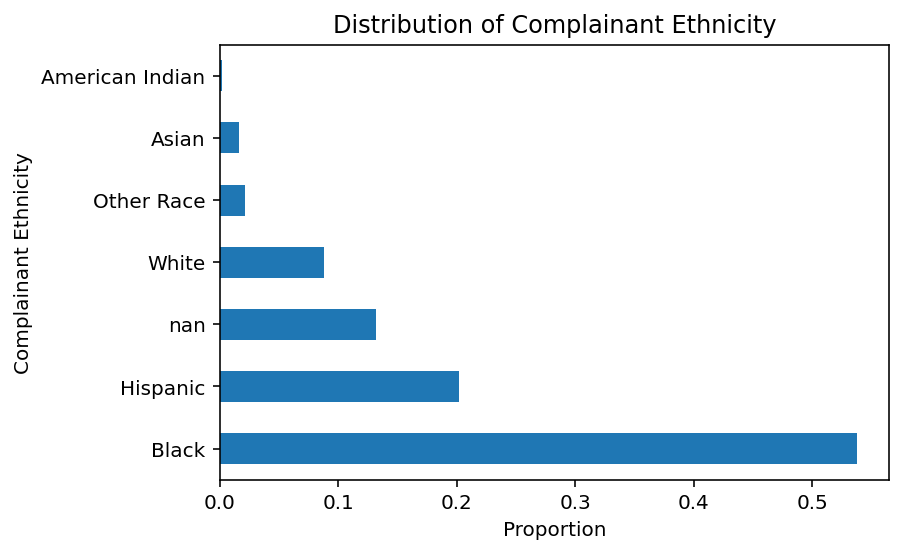

In [17]:
complaints.complainant_ethnicity.value_counts(dropna=False, normalize=True).plot(kind='barh')
plt.title('Distribution of Complainant Ethnicity')
plt.ylabel('Complainant Ethnicity')
plt.xlabel('Proportion')
plt.show()

In [81]:
print('Distribution of Type of Complaint/Allegation')
(complaints.fado_type.value_counts(dropna=False, normalize=True)).round(2)

Distribution of Type of Complaint/Allegation


Abuse of Authority    0.63
Force                 0.22
Discourtesy           0.14
Offensive Language    0.02
Name: fado_type, dtype: float64

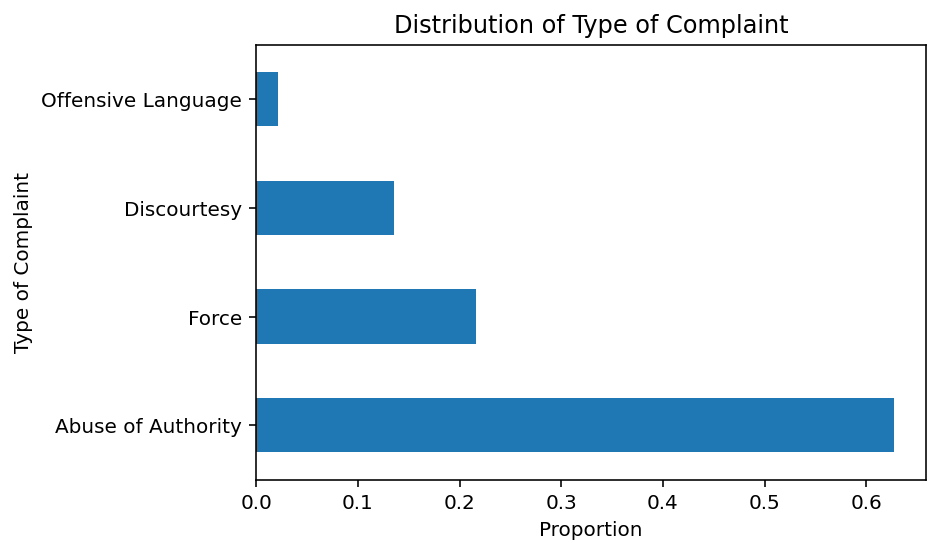

In [19]:
complaints.fado_type.value_counts(dropna=False, normalize=True).plot(kind='barh')
plt.title('Distribution of Type of Complaint')
plt.ylabel('Type of Complaint')
plt.xlabel('Proportion')
plt.show()

While borough is not an attribute originally included in the dataset, the NYPD lists each precinct by borough [(*Precincts - NYPD*, 2022)]('https://www1.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page'). Thus, using the precinct attribute available in the complaints dataset, the borough of each complaint can be added. 

In [20]:
precinct_map = pd.read_csv('precinct_borough.csv')
precinct_map['Precinct_num'] = precinct_map['Precinct'].str.extract(r'([0-9]*)')
precinct_map = precinct_map[['Precinct_num','borough']]
precinct_map = precinct_map.loc[precinct_map.Precinct_num!='']
precinct_map = pd.Series(precinct_map.borough.values,index=precinct_map.Precinct_num.astype(int)).to_dict()
precinct_map[-1] = np.nan
precinct_map[''] = np.nan

In [21]:
complaints.precinct = complaints.precinct.replace({1000.0:-1, 
                                                   np.nan:-1,
                                                  14:-1,
                                                  18:-1,
                                                  22:-1}).astype(int)
complaints['borough'] = complaints.precinct.replace(precinct_map)

In [82]:
print('Disstribution of Borough of Complaint')
(complaints.borough.value_counts(dropna=False, normalize=True)).round(2)

Disstribution of Borough of Complaint


brooklyn         0.38
bronx            0.25
manhattan        0.16
queens           0.14
staten island    0.05
NaN              0.02
Name: borough, dtype: float64

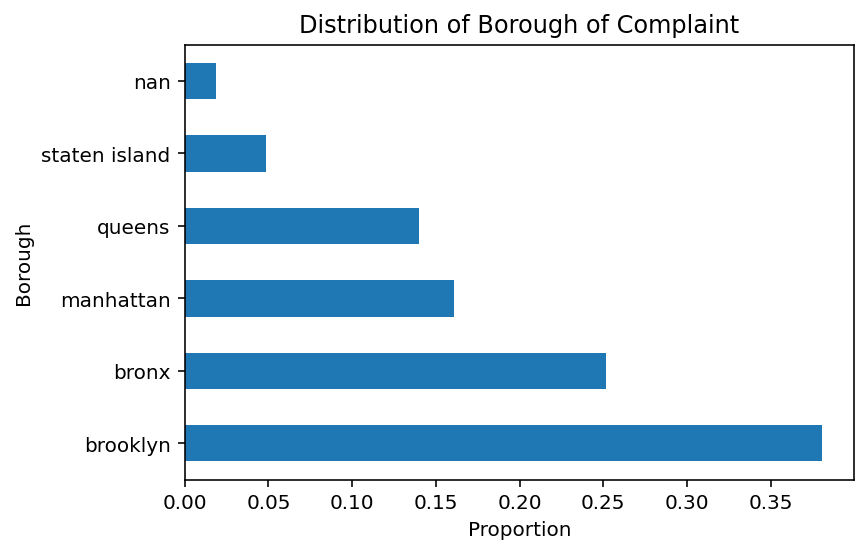

In [23]:
complaints.borough.value_counts(dropna=False, normalize=True).plot(kind='barh')
plt.title('Distribution of Borough of Complaint')
plt.ylabel('Borough')
plt.xlabel('Proportion')
plt.show()

Some shortcomings of the data include the lack of diversity in the ethnicity related variables. The only options are Black, Hispanic, White, Asian, and American Indian. If Afro-Latinx people are recorded as being only Hispanic, this may skew the data. For instance, the ruling of an Afro-Latinx person’s complaint may have been biased by the fact that this complainant is Black, but encoding this complainant as only Hispanic could take away from this. Ethnicity being a poorly defined variable could have altered any inequities the data shows.   

Another shortcoming of the data is its class imbalance and the omission of complaints that investigators could not draw a conclusion from. As seen above, Black complainants make up the majority of complainants. Additionally, around 10% of rows have no listed ethnicity. Since the data reflects the complaints the CCRB receives, resulting classifiers or analysis may be affected by this imbalance. The small size of the substantiated class is another shortcoming of the data. Since the CCRB hardly substantiates complaints, it is more difficult to identify through data what separates a substantiated complaint from one that is not. 

Furthermore, the context in which this dataset was provided is revealing of shortcomings of the data itself and the system from which it originates. Only after ProPublica requested the CCRB to release this data was it provided to the public, leaving the civilians to analyze the data. As an institution of power, the NYPD, CCRB and related government bodies have the resources to analyze this data and audit the quality of their services, yet it seems that they have failed to do so. The NYPD and CCRB, who are responsible for the complaints and the decisions of each complaint, should be the ones to leverage this data to improve their services. However, after civilians have likely noticed no improvement in service, the data was provided to the public, shifting this burden of auditing these institutions of service to the civilians themselves.

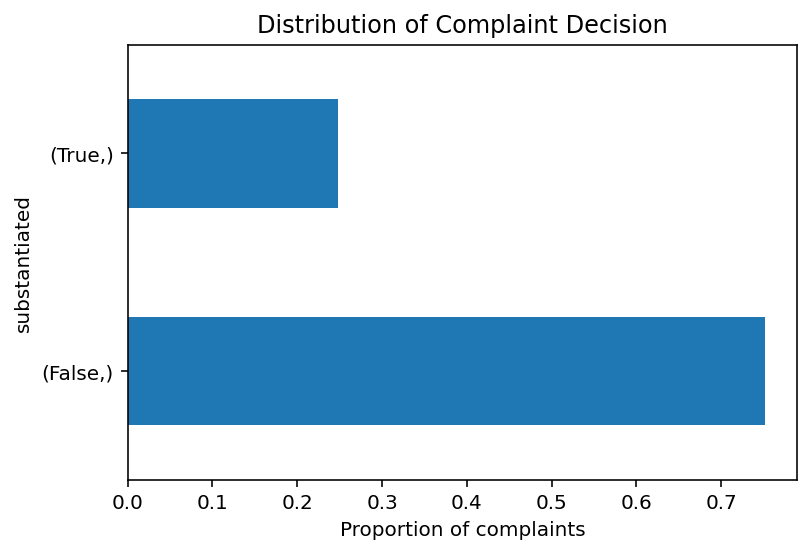

In [116]:
complaints[['substantiated']].value_counts(normalize=True).plot(kind='barh')
plt.xlabel('Proportion of complaints')
plt.title('Distribution of Complaint Decision')
plt.show()

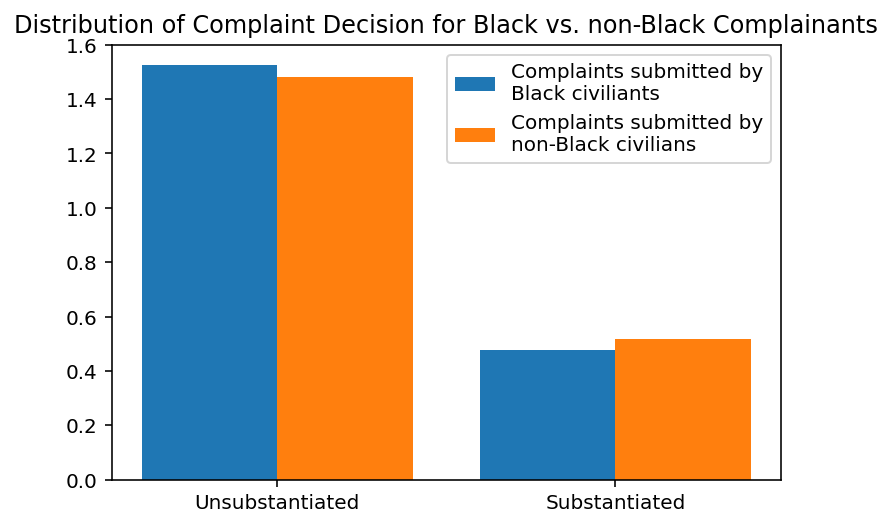

In [117]:
black_sub = complaints.loc[complaints.black]['substantiated'].astype(int)
nb_sub = complaints.loc[~complaints.black]['substantiated'].astype(int)
plt.hist([black_sub,nb_sub], bins=2,density=True)
plt.xticks([0.25,0.75], ['Unsubstantiated', 'Substantiated'])
plt.title('Distribution of Complaint Decision for Black vs. non-Black Complainants')
plt.legend(['Complaints submitted by\nBlack civiliants','Complaints submitted by\nnon-Black civilians'])
plt.show()

In [144]:
# pivot table showing number of complaints of each disposition for black and nonblack complainants
nb_sub = complaints.pivot_table(index='black', 
                        columns='substantiated', aggfunc='size',fill_value=0)
sums = nb_sub.sum(axis=1)
# calculate the proportions of complaints submitted by black and nonblack complainants
# that got substantiated
nb_sub['Substantiated'] =  nb_sub[True] / sums
nb_sub['Not Substantiated'] =  nb_sub[False] / sums
nb_sub = nb_sub[['Substantiated', 'Not Substantiated']].sort_values('Substantiated')
print('Proportion of Substantiated Complaints and Not Substantiated Complaints for Black vs. non-Black Complainants')
nb_sub

Proportion of Substantiated Complaints and Not Substantiated Complaints for Black vs. non-Black Complainants


substantiated,Substantiated,Not Substantiated
black,,
True,0.238084,0.761916
False,0.259498,0.740502


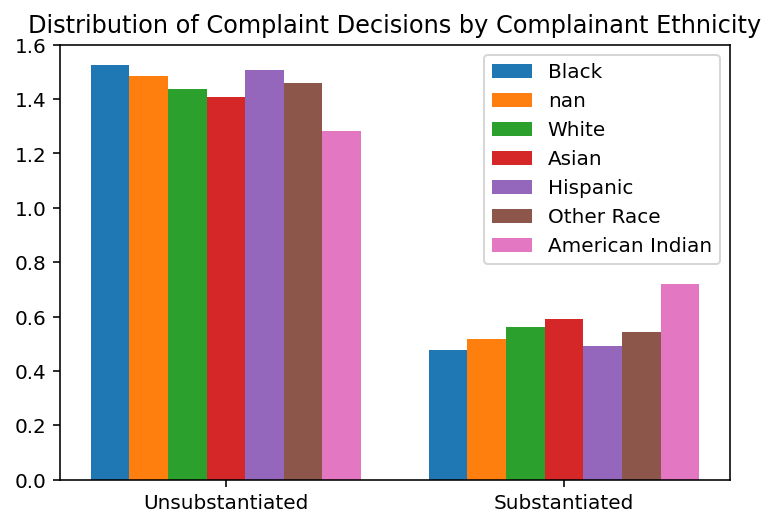

In [84]:
dfs = []
for eth in complaints.complainant_ethnicity.unique():
    if type(eth)!=str:
        dfs.append(complaints.loc[complaints.complainant_ethnicity.isna()]['substantiated'].astype(int))
    else:
        dfs.append(complaints.loc[complaints.complainant_ethnicity == eth]['substantiated'].astype(int))
plt.hist(dfs, bins=2,density=True)
plt.xticks([0.25,0.75], ['Unsubstantiated', 'Substantiated'])
plt.title('Distribution of Complaint Decisions by Complainant Ethnicity')
plt.legend(complaints.complainant_ethnicity.unique())
plt.show()

In [145]:
# pivot table showing number of complaints of each disposition for black and nonblack complainants
nb_sub = complaints.pivot_table(index='complainant_ethnicity', 
                        columns='substantiated', aggfunc='size',fill_value=0)
sums = nb_sub.sum(axis=1)
# calculate the proportions of complaints submitted by black and nonblack complainants
# that got substantiated
nb_sub['Substantiated'] =  nb_sub[True] / sums
nb_sub['Not Substantiated'] =  nb_sub[False] / sums
nb_sub = nb_sub[['Substantiated', 'Not Substantiated']].sort_values('Substantiated')
print('Proportion of Substantiated and Not Substantiated Complaints by Complainant Ethnicity')
nb_sub

Proportion of Substantiated and Not Substantiated Complaints by Complainant Ethnicity


substantiated,Substantiated,Not Substantiated
complainant_ethnicity,,
Black,0.238084,0.761916
Hispanic,0.245993,0.754007
Other Race,0.271212,0.728788
White,0.280683,0.719317
Asian,0.295585,0.704415
American Indian,0.359375,0.640625


## Additional Datasets Incorporated for Analysis

To investigate substantiation rates in relation to police presence, two additional datasets were incorporated – data on arrests and data on stops.  The arrests dataset contains every arrest from 2006 to 2020 in New York City [(*NYPD Arrests Data (Historic)*, 2021)]('https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u'). The stops dataset contains every stop made from 2003 to 2020 in New York City [(*The Stop, Question and Frisk Data*, 2018)]('https://data.cityofnewyork.us/Public-Safety/The-Stop-Question-and-Frisk-Data/ftxv-d5ix'). Both datasets will only be used to find the average number of stops/arrests per year per borough. Presumably, a borough with a high number of average number of stops/arrests per year has a high level of police presence, and a borough with a low number has a lower level of police presence. The graphs below show that Brooklyn and Manhattan have similar arrest numbers, as well as the Bronx and Queens. For the stops data, Manhattan, the Bronx, and Queens have similar values, while Brooklyn and Staten Island are outliers.

In [30]:
arrest_data = pd.read_csv('NYPD_Arrests_Data__Historic_.csv')

In [31]:
columns = ['ARREST_KEY', 'ARREST_DATE', 'ARREST_BORO', 'ARREST_PRECINCT']

In [1]:
arrest_data = arrest_data[columns]

NameError: name 'arrest_data' is not defined

In [33]:
borough_map = {'Q':'queens','M':'manhattan','K':'brooklyn','B':'bronx','S':'staten island'}

In [34]:
arrest_data.ARREST_BORO = arrest_data.ARREST_BORO.replace(borough_map)

In [35]:
arrest_data['year'] = pd.to_datetime(arrest_data.ARREST_DATE).dt.year

In [36]:
arrest_data_counts = arrest_data.groupby(['ARREST_BORO','year'])[['ARREST_KEY']].count().reset_index()

In [87]:
print('Sample Row from Arrests Dataset')
with pd.option_context('display.max_rows', 30):
    print(arrest_data.iloc[[294391]].T)

Sample Row from Arrests Dataset
                     294391
ARREST_KEY        186183469
ARREST_DATE      08/08/2018
ARREST_BORO          queens
ARREST_PRECINCT         110
year                   2018


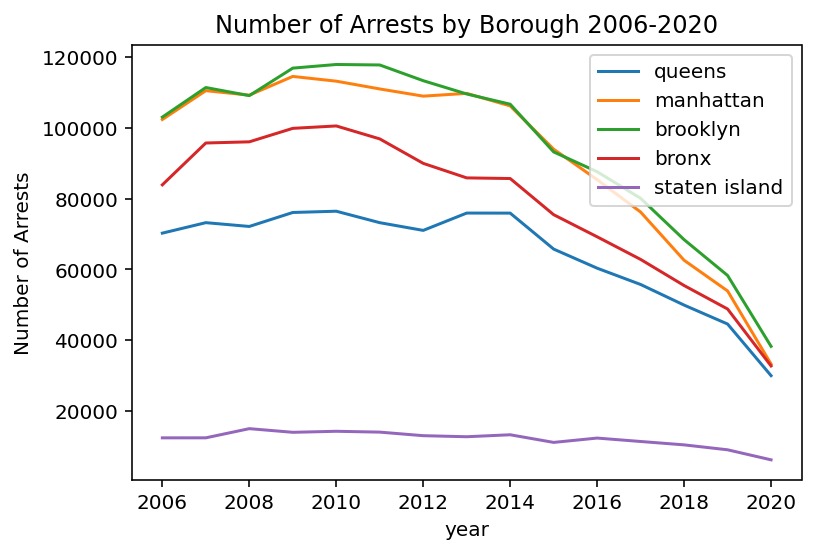

In [88]:
for b in borough_map.values():
#     if b == 'staten island':
#         continue
    df = arrest_data_counts.loc[arrest_data_counts.ARREST_BORO == b]
    df = df.sort_values('year')
    plt.plot(df['year'], df['ARREST_KEY'])
plt.title('Number of Arrests by Borough 2006-2020')
plt.legend(borough_map.values())
plt.xlabel('year')
plt.ylabel('Number of Arrests')
plt.show()

In [146]:
arr_group = arrest_data_counts.groupby('ARREST_BORO')[['ARREST_KEY']].mean().rename(columns={'ARREST_KEY':'Average Number of Arrests per Year'})
print('Average Number of Arrests per Year by Borough')
arr_group

Average Number of Arrests per Year by Borough


,Average Number of Arrests per Year
ARREST_BORO,
bronx,78593.733333
brooklyn,95430.666667
manhattan,92730.400000
queens,64696.733333
staten island,12105.866667


In [40]:
arrest_data_counts_2000s = arrest_data_counts.loc[arrest_data_counts.year < 2010]
arrest_data_counts_2010s = arrest_data_counts.loc[arrest_data_counts.year >= 2010]

In [41]:
arrest_data_means_2000s = arrest_data_counts_2000s.groupby('ARREST_BORO')[['ARREST_KEY']].mean().reset_index()

In [42]:
arrest_data_means_2010s = arrest_data_counts_2010s.groupby('ARREST_BORO')[['ARREST_KEY']].mean().reset_index()

In [44]:
arrest_data_counts_precinct = arrest_data.groupby(['ARREST_PRECINCT','year'])[['ARREST_KEY']].count().reset_index()

In [45]:
arrest_data_means_precinct = arrest_data_counts_precinct.groupby('ARREST_PRECINCT')[['ARREST_KEY']].mean().reset_index()

In [49]:
file = "sqf-{}.csv"
years = range(2003,2021)
stops_dfs = [pd.read_csv(file.format(year)) for year in years]
stops_2003_2016 = stops_dfs[:-4]
stops_2017_2020 = stops_dfs[-4:]
stops_2003_2016_cols = ['year','pct','arstmade','race']
stops_2017_2020_cols = ['YEAR2','SUSPECT_ARRESTED_FLAG','SUSPECT_RACE_DESCRIPTION','STOP_LOCATION_PRECINCT','STOP_LOCATION_BORO_NAME']
race = '''
A,ASIAN / PACIFIC ISLANDER;
B,BLACK;
I,AMERICAN INDIAN/ALASKAN NATIVE;
P,BLACK HISPANIC;
Q,WHITE HISPANIC;
W,WHITE;
X,UNKNOWN;
Z,OTHER
'''
race = race.replace('\n','').split(';')
race_map = {s.split(',')[0]:s.split(',')[1] for s in race}
stops_2003_2016 = [df[stops_2003_2016_cols] for df in stops_2003_2016]
stops_2017_2020 = [df[stops_2017_2020_cols] for df in stops_2017_2020]
stops_2003_2016 = pd.concat(stops_2003_2016)
stops_2017_2020 = pd.concat(stops_2017_2020)
stops_2017_2020 = stops_2017_2020.loc[~stops_2017_2020.STOP_LOCATION_PRECINCT.isin(['#NULL!', '208760'])]
stops_2003_2016.pct = stops_2003_2016.pct.replace({np.nan:'-1', ' ':'-1', 999:'-1'})
stops_2003_2016.pct = stops_2003_2016.pct.astype(int)
stops_2017_2020.STOP_LOCATION_PRECINCT = stops_2017_2020.STOP_LOCATION_PRECINCT.astype(int)
stops_2003_2016['borough'] = stops_2003_2016.pct.replace(precinct_map)
stops_2017_2020.rename(columns={
    'YEAR2':'year',
    'SUSPECT_ARRESTED_FLAG':'arstmade',
    'SUSPECT_RACE_DESCRIPTION':'race',
    'STOP_LOCATION_PRECINCT':'pct',
    'STOP_LOCATION_BORO_NAME':'borough'
},inplace=True)
stops_2017_2020 = stops_2017_2020[stops_2003_2016.columns]
stops_2003_2016.race = stops_2003_2016.race.replace(race_map)
stops_2017_2020.race = stops_2017_2020.race.replace({'AMERICAN INDIAN/ALASKAN N':'AMERICAN INDIAN/ALASKAN NATIVE',
                             'AMER IND':'AMERICAN INDIAN/ALASKAN NATIVE',
                             'ASIAN/PAC.ISL' : 'ASIAN / PACIFIC ISLANDER'})
stops = pd.concat([stops_2017_2020, stops_2003_2016])
stops.arstmade = stops.arstmade == 'Y'
stops['borough'] = stops.pct.replace(precinct_map)
stops = stops.loc[~stops.borough.isin([18,14,22,-1])]
stops = stops.loc[stops.year != ' ']
stops.year = stops.year.astype(int)
stops_data_counts = stops.groupby(['borough','year'])[['pct']].count().reset_index().rename(columns={'pct':'count'})
stops_data_counts_2000s = stops_data_counts.loc[stops_data_counts.year < 2010]
stops_data_counts_2010s = stops_data_counts.loc[stops_data_counts.year >= 2010]
stops_data_means_2000s = stops_data_counts_2000s.groupby('borough')[['count']].mean().reset_index()
stops_data_means_2010s = stops_data_counts_2010s.groupby('borough')[['count']].mean().reset_index()

In [90]:
print('Sample Row from Stop and Frisk Datasest')
with pd.option_context('display.max_rows', 30):
    print(stops.iloc[[294391]].T)

Sample Row from Stop and Frisk Datasest
             95880
year          2004
pct             79
arstmade     False
race         BLACK
borough   brooklyn


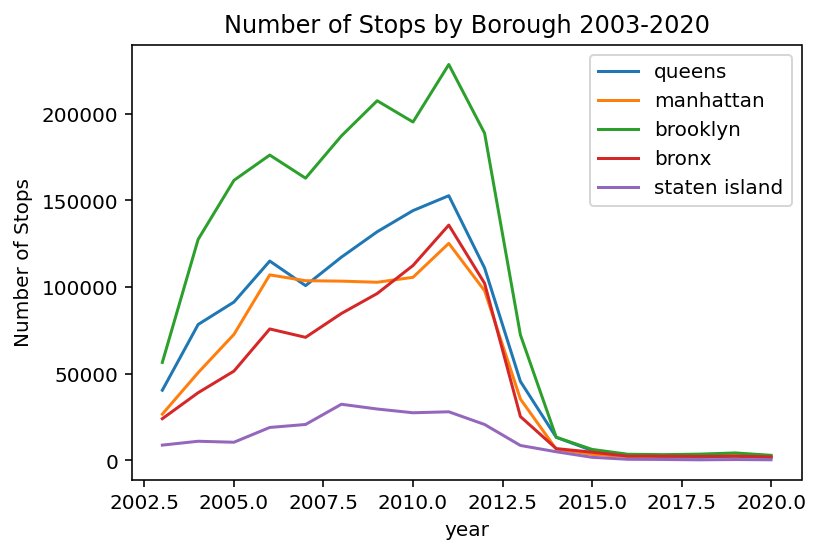

In [94]:
for b in borough_map.values():
#     if b == 'staten island':
#         continue
    df = stops_data_counts.loc[stops_data_counts.borough == b]
    df = df.sort_values('year')
    plt.plot(df['year'], df['count'])
plt.title('Number of Stops by Borough 2003-2020')
plt.legend(borough_map.values())
plt.xlabel('year')
plt.ylabel('Number of Stops')
plt.show()

In [147]:
stop_group = stops.groupby(['borough'])[['pct']].count().reset_index().rename(columns={'pct':'count'})
print('Total Number of Stops Made by Borough 2003-2020')
stop_group

Total Number of Stops Made by Borough 2003-2020


,borough,count
0,bronx,841355
1,brooklyn,1801180
2,manhattan,953880
3,queens,1158819
4,staten island,226276


In [53]:
bs = stops_data_counts_2000s.borough.unique()

Again, the assumption regarding true underlying base rates of substantiation is that substantiation rates should be the same across complainant ethnicity and location, i.e., all complainant ethnicities and boroughs are equally likely to submit a legitimate complaint. Conditioned on levels of police presence, boroughs should see the same rates of substantiation. To calculate demographic parity, boroughs with the closest values for average number of arrests/stops per year will be compared.

# Quantitative Measures of Fairness
Since the dataset does not have an attribute indicating whether the CCRB's ruling is correct, only demographic parity can be calculated. 

## Demographic Parity of Ethnicity

We expect the rates of substantiation to be similar for complaints submitted by Black complainants and non-Black complainants: $P(\text{disposition} = \text{Substantiated } | \text{ complainant ethnicity} = \text{Black}) = P(\text{disposition} = \text{Substantiated } | \text{ complainant ethnicity} \neq \text{Black})$. In the dataset, complaints submitted by Black people are substantiated 2% less. A hypothesis test is used to verify this violation of demographic parity:

$H_0$: The proportion of complaints by Black complainants that are substantiated is the same for complaints by non-Black complainants.

$H_A$: The proportion of complaints by Black complainants that are substantiated is less than that for complaints by non-Black complainants.

The observed difference falls outside of this distribution and the p-value is much lower than $\alpha = 0.001$, warranting rejection of $H_0$. It seems that whether a complaint is substantiated is not independent of complainant ethnicity, violating demographic parity.

In [124]:
# pivot table showing number of complaints of each disposition for black and nonblack complainants
nb_sub = complaints.pivot_table(index='black', 
                        columns='substantiated', aggfunc='size',fill_value=0)
sums = nb_sub.sum(axis=1)
# calculate the proportions of complaints submitted by black and nonblack complainants
# that got substantiated
nb_sub['Substantiated'] =  nb_sub[True] / sums
nb_sub['Not Substantiated'] =  nb_sub[False] / sums
# proportion of all complaints filed by black complainants and nonblack complainants 
prop_black_comp = complaints.loc[complaints['black']].shape[0]/complaints.shape[0]
nb_sub['Overall Proportion'] = [1-prop_black_comp, prop_black_comp]

In [125]:
observed = nb_sub['Substantiated'][True]-nb_sub['Substantiated'][False]

In [126]:
print('Observed Difference in Substantiation Rate for Black vs. non-Black Complainants: {}'.format(observed))

Observed Difference in Substantiation Rate for Black vs. non-Black Complainants: -0.021414155190785017


In [127]:
def permutation_test(df, observed, n_repetitions):
    test_statistics = []
    for _ in range(n_repetitions):
        # shuffle the statistic of interest
        shuffled_values = (df['black'].sample(replace=False, frac=1)
            .reset_index(drop=True))
        # put them in a table
        shuffled = df.assign(**{'Shuffled Values': shuffled_values})
        # compute the group differences (test statistic!)
        # difference in means:
        nb_disposition = shuffled.pivot_table(index='Shuffled Values', 
                            columns='substantiated', aggfunc='size',fill_value=0)
        sums = nb_disposition.sum(axis=1)
        nb_disposition['Substantiated'] =  nb_disposition[True] / sums
        difference = nb_disposition['Substantiated'][True]-nb_disposition['Substantiated'][False]
        # add it to the list of results
        test_statistics.append(difference)
    p_value = np.count_nonzero(test_statistics <= observed) / n_repetitions
    return (test_statistics, p_value)

In [128]:
test_statistics, p_value = permutation_test(complaints, observed, 5000)

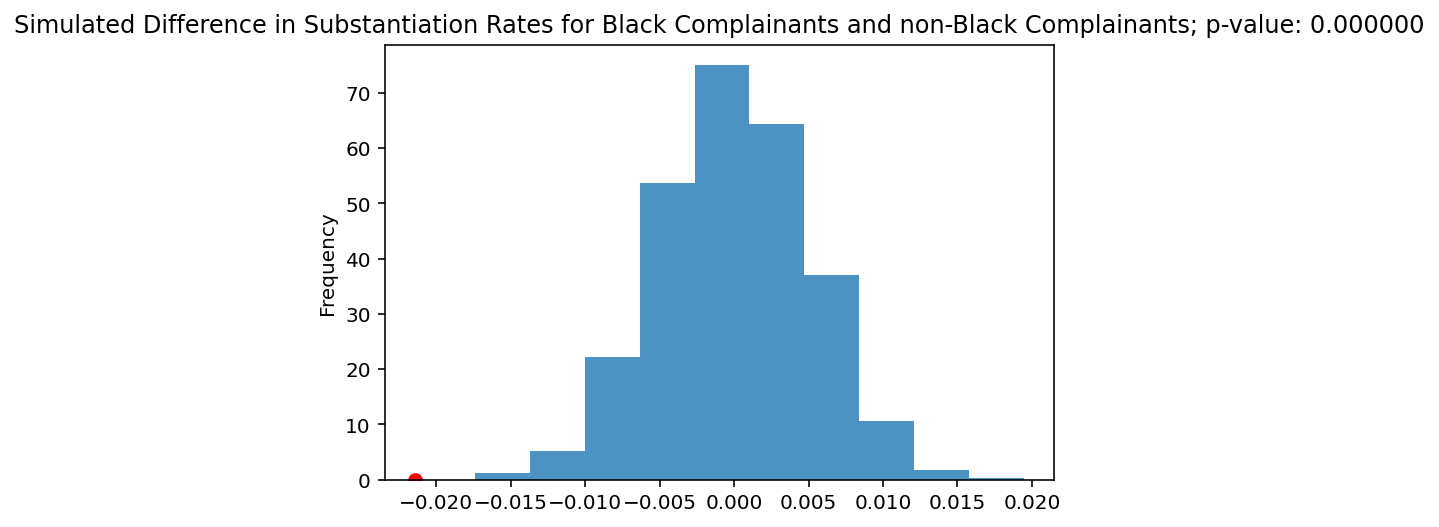

In [129]:
title = 'Simulated Difference in Substantiation Rates for Black Complainants and non-Black Complainants'
title += '; p-value: %f' % p_value
(pd.Series(test_statistics)).plot(kind='hist', density=True, alpha=0.8, title=title)
plt.scatter(observed, 0, color='red', s=40)
plt.show()

## Demographic Parity of Boroughs

Presumably, complaints occurring in boroughs with similar levels of police presence have similar rates of substantiation because the likelihood of police interaction and the likelihood of an interaction that warrants a complaint are presumably related to levels of police presence. More police presence could be associated with higher levels of substantiation rate due to the presumed increase in frequency of interactions with an officer that warrant a complaint. Alternatively, more of police presence could be associated with lower levels of substantiation rates because the complainant could be more likely to be a criminal and make a false complaint or an officer could have more jurisdiction and thus be given the benefit of the doubt. Demographic parity of boroughs assumes that boroughs with similar levels of police presence (as measured by average number of arrests/stops) should have similar rates of substantiation. Manhattan and Brooklyn and Queens and the Bronx have the closest vales for average number of arrests per year and thus will be compared. Staten Island is on its own with a much lower average number of arrests per year. Thus we expect: $P(\text{Substantiated } | \text{ Borough} = \text{Brooklyn})$ = $P(\text{Substantiated } | \text{ Borough} = \text{Manhattan})$ and $P(\text{Substantiated } | \text{ Borough} = \text{Queens})$ = $P(\text{Substantiated } | \text{ Borough} = \text{the Bronx})$ to hold for demographic parity. Since Staten Island is so drastically different from the other boroughs, we would expect its substantiation rate to also be different. 

Although the proportion of complaints occurring in Brooklyn is over double that for Manhattan, complaints occurring Brooklyn are substantiated 4.6% less often. Another hypothesis test will be conducted to see if the violation of demographic parity holds:

$H_0$: The proportion of complaints from Brooklyn that are substantiated is the same for complaints from Manhattan. 

$H_A$: The proportion of complaints from Brooklyn that are substantiated is less than that for complaints from Manhattan. 

The p-value is much lower than $\alpha = 0.001$, leading us to reject $H_0$ and violating demographic parity. Despite having similar levels of police presence, complaints occurring in Brooklyn are less likely to be substantiated than complaints occurring in Manhattan.

While complaints occurring in the Bronx are substantiated 1.7% less of the time than complaints submitted in Queens, despite these boroughs having similar levels of police presence, the hypothesis test says otherwise. With a p-value much higher than $\alpha = 0.001$, we fail to reject $H_0$, suggesting that substantiation rates for the Bronx and Queens are fairly similar.

In [148]:
# pivot table showing number of complaints of each disposition for manhattan and brooklyn
filt = complaints.loc[complaints.borough.isin(['manhattan','brooklyn'])]
bm_sub = filt.pivot_table(index='borough', 
                        columns='substantiated', aggfunc='size',fill_value=0)
sums = bm_sub.sum(axis=1)
# calculate the proportions of complaints submitted from manhattan and brooklyn
# that got substantiated
bm_sub['Substantiated'] =  bm_sub[True] / sums
bm_sub['Not Substantiated'] =  bm_sub[False] / sums
# proportion of all complaints filed from manhattan and brooklyn
props = complaints.borough.value_counts(normalize=True,dropna=False)
bm_sub['Overall Proportion'] = [props['brooklyn'], props['manhattan']]
bm_sub = bm_sub[['Substantiated', 'Overall Proportion']]
print('Substantiation Rates for Brooklyn vs. Manhattan')
bm_sub

Substantiation Rates for Brooklyn vs. Manhattan


substantiated,Substantiated,Overall Proportion
borough,,
brooklyn,0.226688,0.380832
manhattan,0.272582,0.160588


In [107]:
observed = 0.226688 - 0.272582
print('Observed Difference in Substantiation Rate for Brooklyn vs. Manhattan: {}'.format(observed))

Observed Difference in Substantiation Rate for Brooklyn vs. Manhattan: -0.04589399999999999


In [61]:
def permutation_test_arrests(df, observed, n_repetitions, boroughs):
    test_statistics = []
    for _ in range(n_repetitions):
        # shuffle the statistic of interest
        shuffled_values = (df['borough'].sample(replace=False, frac=1)
            .reset_index(drop=True))
        # put them in a table
        shuffled = df.assign(**{'Shuffled Values': shuffled_values})
        # compute the group differences (test statistic!)
        # difference in means:
        nb_disposition = shuffled.pivot_table(index='Shuffled Values', 
                            columns='substantiated', aggfunc='size',fill_value=0)
        sums = nb_disposition.sum(axis=1)
        nb_disposition['Substantiated'] =  nb_disposition[True] / sums
        difference = nb_disposition['Substantiated'][boroughs[0]]-nb_disposition['Substantiated'][boroughs[1]]
        # add it to the list of results
        test_statistics.append(difference)
    p_value = np.count_nonzero(np.array(test_statistics) <= observed) / n_repetitions
    return (test_statistics, p_value)

In [62]:
test_stats_arrest_bm, p_value_arrest_bm = permutation_test_arrests(complaints.loc[complaints.borough.isin(['manhattan','brooklyn'])],
                                                                  observed, 1000, ['brooklyn','manhattan'])

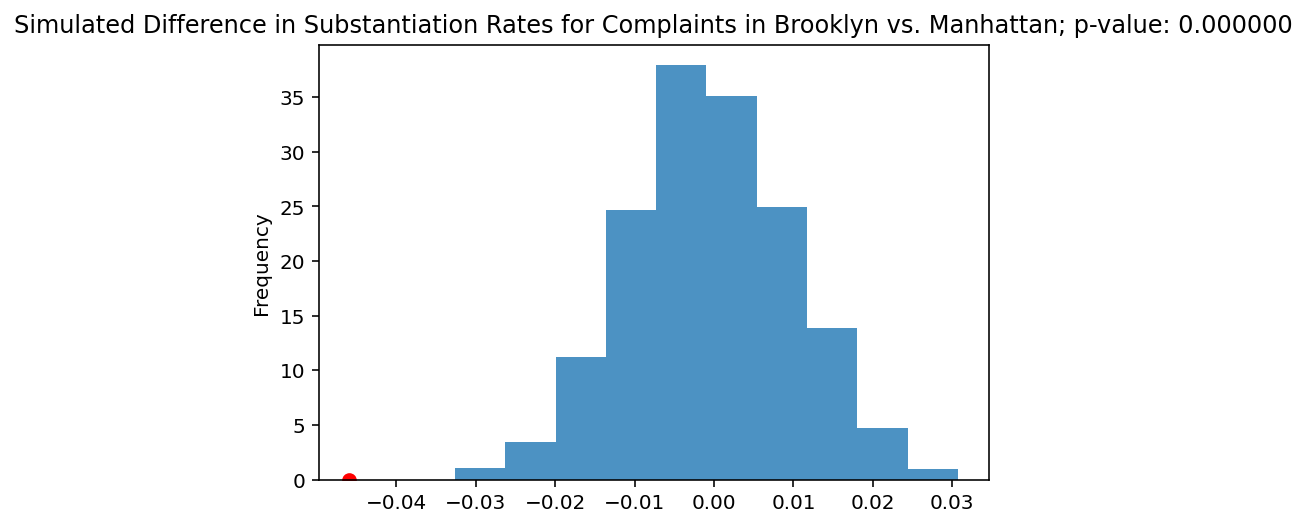

In [108]:
title = 'Simulated Difference in Substantiation Rates for Complaints in Brooklyn vs. Manhattan'
title += '; p-value: %f' % p_value_arrest_bm
(pd.Series(test_stats_arrest_bm)).plot(kind='hist', density=True, alpha=0.8, title=title)
plt.scatter(observed, 0, color='red', s=40)
plt.show()

In [149]:
# pivot table showing number of complaints of each disposition for manhattan and brooklyn
filt = complaints.loc[complaints.borough.isin(['queens','bronx'])]
bm_sub = filt.pivot_table(index='borough', 
                        columns='substantiated', aggfunc='size',fill_value=0)
sums = bm_sub.sum(axis=1)
# calculate the proportions of complaints submitted from manhattan and brooklyn
# that got substantiated
bm_sub['Substantiated'] =  bm_sub[True] / sums
bm_sub['Not Substantiated'] =  bm_sub[False] / sums
# proportion of all complaints filed from manhattan and brooklyn
props = complaints.borough.value_counts(normalize=True,dropna=False)
bm_sub['Overall Proportion'] = [props['bronx'], props['queens']]
bm_sub = bm_sub[['Substantiated', 'Overall Proportion']]
print('Substantiation Rates for the Bronx vs. Queens')
bm_sub

Substantiation Rates for the Bronx vs. Queens


substantiated,Substantiated,Overall Proportion
borough,,
bronx,0.253595,0.251657
queens,0.270747,0.139678


In [110]:
observed_bq=0.253595-0.270747
print('Observed Difference in Substantiation Rate for the Bronx vs. Queens: {}'.format(observed_bq))

Observed Difference in Substantiation Rate for the Bronx vs. Queens: -0.017152


In [66]:
test_stats_arrest_bq, p_value_arrest_bq = permutation_test_arrests(complaints.loc[complaints.borough.isin(['bronx','queens'])],
                                                                  observed_bq, 1000, ['bronx','queens'])

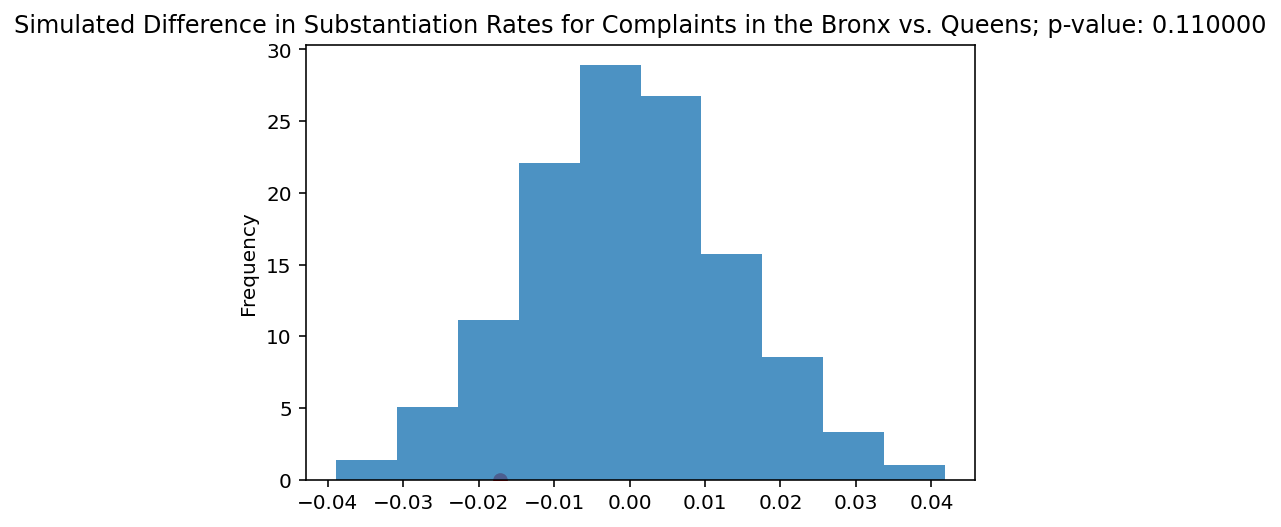

In [112]:
title = 'Simulated Difference in Substantiation Rates for Complaints in the Bronx vs. Queens'
title += '; p-value: %f' % p_value_arrest_bq
(pd.Series(test_stats_arrest_bq)).plot(kind='hist', density=True, alpha=0.8, title=title)
plt.scatter(observed_bq, 0, color='red', s=40)
plt.show()

When looking at the stops data, there is a different grouping. Manhattan, the Bronx, and Queens have the most similar number of stops per year. Brooklyn is on its own with the highest number of stops, and Staten Island is on its own with the lowest. Thus we expect: $P(\text{Substantiated } | \text{ Borough} = \text{Manhattan}) =$ $P(\text{Substantiated } | \text{ Borough} = \text{the Bronx}) =$ $P(\text{Substantiated } | \text{ Borough} = \text{Queens})$. Although complaints occurring in the Bronx are substantiated nearly 2% less of the time than complaints submitted in Manhattan and Queens, the hypothesis test says otherwise. With a p-value much higher than $\alpha = 0.001$, we fail to reject $H_0$, suggesting that substantiation rates for the Bronx, Manhattan, and Queens are fairly similar and that demographic parity holds.

In [150]:
# pivot table showing number of complaints of each disposition for manhattan and brooklyn
filt = complaints.loc[complaints.borough.isin(['manhattan','bronx','queens'])]
bm_sub = filt.pivot_table(index='borough', 
                        columns='substantiated', aggfunc='size',fill_value=0)
sums = bm_sub.sum(axis=1)
# calculate the proportions of complaints submitted from manhattan and brooklyn
# that got substantiated
bm_sub['Substantiated'] =  round(bm_sub[True] / sums, 2)
bm_sub['Not Substantiated'] =  bm_sub[False] / sums
# proportion of all complaints filed from manhattan and brooklyn
props = complaints.borough.value_counts(normalize=True,dropna=False)
bm_sub['Overall Proportion'] = [props.loc['bronx'], props.loc['manhattan'], props.loc['queens']]
bm_sub = bm_sub[['Substantiated', 'Overall Proportion']]
print('Substantiation Rates for the Bronx vs. Queens vs. Manhattan')
bm_sub

Substantiation Rates for the Bronx vs. Queens vs. Manhattan


substantiated,Substantiated,Overall Proportion
borough,,
bronx,0.25,0.251657
manhattan,0.27,0.160588
queens,0.27,0.139678


In [114]:
observed_bm_stops = 0.253595-0.272582
print('Observed Difference in Substantiation Rate for the Bronx vs. Manhattan: {}'.format(observed_bm_stops))

Observed Difference in Substantiation Rate for the Bronx vs. Manhattan: -0.018986999999999976


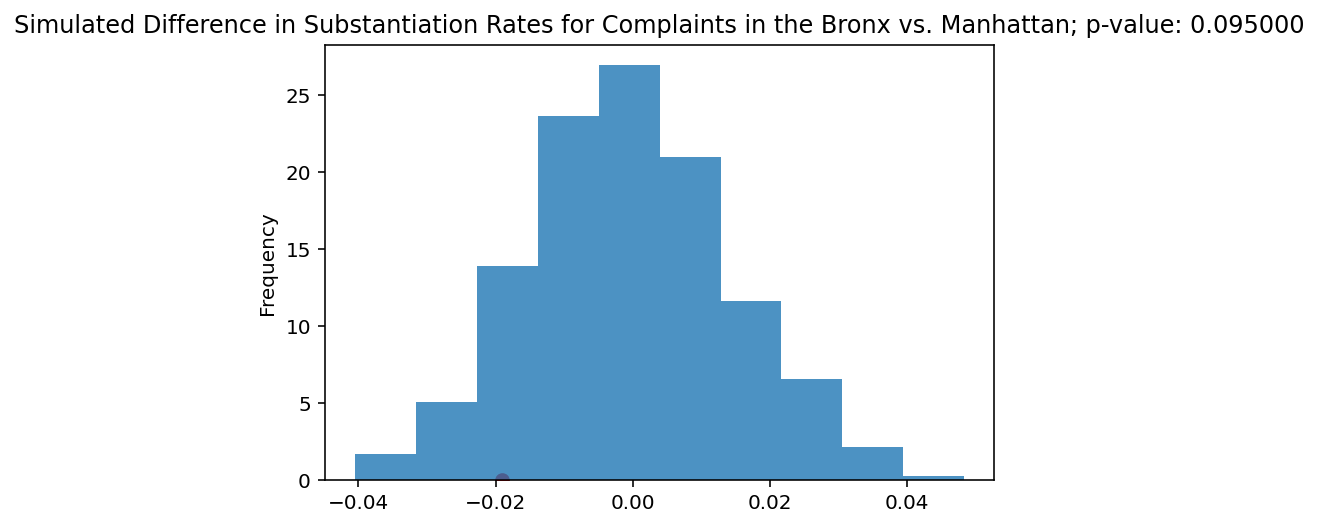

In [115]:
test_stats_stops_bm, p_value_stops_bm = permutation_test_arrests(complaints.loc[complaints.borough.isin(['bronx','manhattan'])],
                                                                  observed_bm_stops, 1000, ['bronx','manhattan'])
title = 'Simulated Difference in Substantiation Rates for Complaints in the Bronx vs. Manhattan'
title += '; p-value: %f' % p_value_stops_bm
(pd.Series(test_stats_stops_bm)).plot(kind='hist', density=True, alpha=0.8, title=title)
plt.scatter(observed_bm_stops, 0, color='red', s=40)
plt.show()

## Other Parity Metrics and the Limitations of the Dataset

In this context, the classifier is the CCRB deciding whether the allegation truly happened and violated NYPD rules, warranting substantiation. The ground truth is whether this classifier is correct. Since the review board cannot truly know whether an allegation actually took place, the closest way for the ground truth to be determined is to: conduct questioning of the accused officer and the complainant, conduct a trial by jury, and require the NYPD to provide any relevant evidence (e.g., body camera footage). While this couldn't capture the exact truth in all cases, it is the besting thing present in the criminal justice system. For this classifier, a false positive refers to a complaint that was substantiated by the CCRB, but the allegation did not actually occur (as determined by the steps explained above). A false negative is when a complaint was not substantiated by the CCRB, but the trial found that the allegation actually occurred. The complainant, who seeks a sense of justice through getting substantiated, would be more hurt by a false negative. For a police officer, who has a reputation and livelihood to maintain, a false positive would be more detrimental.

### Accuracy Parity

Accuracy parity would require the accuracy of the CCRB to be equal across complainant ethnicity and borough of complaint (conditioned on level of police presence). However, since the impacts of false positives and false negatives differ depending on whether one is the complainant or accused officer, accuracy parity would not be applicable. For example, if the classifier had equally high false negative rates for all complainants, then no complainants would benefit; only officers would benefit. 

### Equality of Odds

Equality of odds would require that the false positive and true positive rates are the same for all complainants. The classifier in question could be thought of as allocating a beneficial thing, substantiation. The complainant benefits from substantiation by receiving a notion of justice or retribution. The public benefits from substantiation because the officers who may otherwise continue violating NYPD rules are punished, preventing further complaints. Additionally, the NYPD could benefit from substantiation because punishing officers that violate NYPD rules makes the NYPD appear more reputable and honorable. Thus, equality of odds would be a more appropriate parity measure to enforce than accuracy parity.

### Predictive Value Parity

Positive predictive value parity would require that the chance of success (true positive) be the same across groups. This means that across complainant ethnicity and borough, complaints that actually occurred should have the same chance of being substantiated. Negative predict value parity would require that the chance of a true negative, meaning a complaint that did not actually occur does not get substantiated, be equal across complainant ethnicity and borough. Enforcing both conditions would be appropriate in this context. Since predictive value parity would require that deserving complainants receive a sense of justice and officers are not wrongly punished, this parity metric would be the best to apply to these complaints.

# Intepretation of Results and Conclusion 

Black civilians' complaints are substantiated less often than non-Black civilians', and this discrepancy is statistically significant. Based on this violation of demographic parity, the CCRB does not seem to be fair in reviewing civilian complaints. When comparing substantiation rates by borough, complaints occurring in Brooklyn were substantiated 4.6% less than complaints occurring in Manhattan, despite these boroughs having similar levels of police presence, violating demographic parity. Even when accounting for levels of police presence, it seems that the CCRB was not fair towards Brooklyn. For boroughs with lower levels of police presence, the Bronx and Queens, the hypothesis test suggested that demographic parity was not violated. When using the number of stops made as a proxy for police presence, the three boroughs with similar levels, Queens, the Bronx, and Manhattan, seemed to have similar levels of substantiation.

Although it is assumed that the base rates are equal across complainant ethnicity (no ethnicity is more likely to submit a false complaint), this assumption may not be true in reality. If the underlying base rates of substantiation should actually differ across groups, then it'd be expected for demographic parity to be violated. Demographic parity could be violated because the CCRB may not weigh the allegations of a Black complainant in the same manner as they might for a non-Black complainant. The frequency of complaints made by Black people relative to other ethnicities may make the CCRB substantiate their complaints at a different rate. For example, since an Asian person is much less likely to submit a complaint, the CCRB may take the Asian person's allegation more seriously than a Black person's and thus be more likely to substantiate the Asian person's complaint. While this does not seem to be fair, as such logic is explicitly biased against one group, it could explain why demographic parity was violated. A similar logic can be applied to explain why demographic parity by borough was violated. Since someone from Queens is much less likely to submit a complaint than someone from Brooklyn, the CCRB may weigh the complainant from Queens' words more heavily and be more likely to substantiate their complaint than someone from Brooklyn.

As mentioned before, the dataset and using demographic parity to analyze the potential inequity in substantiation rates has many limitations. Since there is no real way to uncover the ground truth, it is difficult to identify any irrefutable inequity using only the data. Furthermore, since Black complainants and complainants from Brooklyn are overrepresented in the dataset, the observed substantiation rates could actually be closer to the truth. In other words, since there is limited data on complaints from non-Black people and from outside of Brooklyn, the substantiation rates for these groups may be inflated. All in all, while analyzing this discrepancy in substantiation rates across complainant ethnicity using data has its limits, a qualitative investigation could be more useful in exploring this potential inequity. 

# Works Cited

Feuer, A. (2021, October 10). Black New Yorkers Are Twice as Likely to Be Stopped by the Police, Data Shows. The New York Times. https://www.nytimes.com/2020/09/23/nyregion/nypd-arrests-race.html

Fraenkel, A. (2020). Fairness and Algorithmic Decision Making [Lecture Notes]. Fairness and Algorithmic Decision Making. https://afraenkel.github.io/fairness-book/

Lepore, J. (2020, July 13). *The Invention of the Police*. The New Yorker. https://www.newyorker.com/magazine/2020/07/20/the-invention-of-the-police

Li, D. K., & Dienst, J. (2021, May 12). *Corruption probe of NYPD officers reveals “unabashedly racist” texts, officials say*. NBC News. https://www.nbcnews.com/news/us-news/corruption-probe-nypd-officers-reveals-unabashedly-racist-texts-officials-say-n1267121

Middleton, P., & Pilgrim, D. (2022, February 28). *Nigger (the word), a story*. African American Registry. https://aaregistry.org/story/nigger-the-word-a-brief-history/

*Newly-released data shows City continues to deny equitable police*. (2017, July 25). ACLU of Illinois. https://www.aclu-il.org/en/press-releases/newly-released-data-shows-city-continues-deny-equitable-police-services-south-and

*NYPD Arrests Data (Historic)*. (2021, May 3). NYC Open Data. https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u

*Precincts - NYPD*. (2022). NYC | New York Police Department. https://www1.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page

Smyton, R. (2020, June 17). How Racial Segregation and Policing Intersect in America. Tufts Now. https://now.tufts.edu/2020/06/17/how-racial-segregation-and-policing-intersect-america

*The NYPD Files*. (2020, July 7). ProPublica Data Store. https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers

*The Stop, Question and Frisk Data*. (2018, September 10). NYC Open Data. https://data.cityofnewyork.us/Public-Safety/The-Stop-Question-and-Frisk-Data/ftxv-d5ix